In [73]:
#importing required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()
from pandas_datareader import data as pdr
#import fix_yahoo_finance as yf
import plotly.express as px
from sklearn.linear_model import LinearRegression 
from matplotlib.pyplot import figure
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [4]:
# Getting the data of the stock price of a company from Yahoo finance. 
df_full = pdr.get_data_yahoo("RELIANCE.NS", start = "2018-01-01").reset_index()
#Saving the data to a local path 
df_full.to_csv('RELIANCE.NS.csv', index = False)
#Having a look at first 5 rows of the downloaded data
df_full.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2018-01-01,922.700012,907.500000,922.700012,909.750000,4321686.0,899.194580
1,2018-01-02,919.549988,906.400024,913.000000,911.150024,4342815.0,900.578369
2,2018-01-03,926.000000,913.049988,925.000000,914.799988,6175312.0,904.185974
3,2018-01-04,921.799988,915.700012,918.150024,920.299988,4118581.0,909.622131
4,2018-01-05,926.900024,920.250000,921.799988,923.250000,3401905.0,912.537903


In [25]:
#Reading the data from the local path into the python environment
df_full = pd.read_csv('RELIANCE.NS.csv')

In [26]:
#Checking the information of the data read into python 
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
Date         414 non-null object
High         414 non-null float64
Low          414 non-null float64
Open         414 non-null float64
Close        414 non-null float64
Volume       414 non-null float64
Adj Close    414 non-null float64
dtypes: float64(6), object(1)
memory usage: 22.7+ KB


### Stock data can be plotted using Matplot lib as shown below

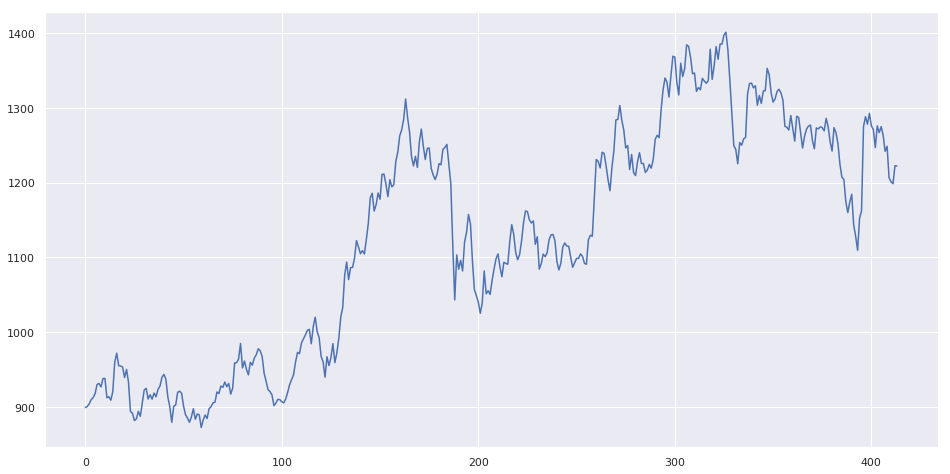

In [22]:
plt.figure(figsize=(16,8))
plt.plot(df_full['Adj Close'], label='Close Price history')

### Since Date column is not our index, matplotlib is not showing dates on the x axis. I am using plotly instead so that we can have dates on the x axis 

In [23]:
fig = px.line(df_full, x = "Date", y = "Adj Close")
fig.show()

#### Generating additional features using OHLC Data

In [28]:

d1 = df_full.loc[:,['Date','Adj Close']]
d1['daily_gain'] = (df_full.Close/df_full.Open)-1 #Daily gain
d1['hi_lo_per'] = (df_full['High']-df_full['Low'])/df_full['Close']*100 #High Low percentage
d1['pct_change_price'] = (df_full['Close']-df_full['Open'])/df_full['Open']*100 #Percentage change in price
d1['pct_change_volume'] = df_full['Volume']/df_full['Volume'].shift(1) #percentage change in volume


#### checking the first 5 rows of the data

In [29]:
d1.head()

,Date,Adj Close,daily_gain,hi_lo_per,pct_change_price,pct_change_volume
0,2018-01-01,899.194580,-0.014035,1.670790,-1.403491,NaN
1,2018-01-02,900.578369,-0.002026,1.443227,-0.202626,1.004889
2,2018-01-03,904.185974,-0.011027,1.415611,-1.102704,1.421961
3,2018-01-04,909.622131,0.002342,0.662825,0.234163,0.666943
4,2018-01-05,912.537903,0.001573,0.720284,0.157302,0.825990


#### Removing Missing Values

In [30]:
d1.fillna(value = -99999,inplace = True)

In [0]:
d1.head()

,Date,Adj Close,daily_gain,hi_lo_per,pct_change_price,pct_change_volume
0,2018-01-01,899.194580,-0.014035,1.670790,-1.403491,-99999.000000
1,2018-01-02,900.578369,-0.002026,1.443227,-0.202626,1.004889
2,2018-01-03,904.185974,-0.011027,1.415611,-1.102704,1.421961
3,2018-01-04,909.622131,0.002342,0.662825,0.234163,0.666943
4,2018-01-05,912.537903,0.001573,0.720284,0.157302,0.825990


In [31]:
d1.tail()

,Date,Adj Close,daily_gain,hi_lo_per,pct_change_price,pct_change_volume
409,2019-09-03,1206.400024,-0.028859,3.564324,-2.885891,0.757244
410,2019-09-04,1201.150024,0.000500,1.598464,0.049975,1.759119
411,2019-09-05,1198.599976,-0.006795,1.660262,-0.679489,0.697903
412,2019-09-06,1222.500000,0.016209,2.760736,1.620948,1.008320
413,2019-09-09,1222.199951,0.001270,1.624119,0.126976,0.506653


#### Creating training and testing data training data will be from Jan 2018 to June 2019 testing data will be from July 2019 to Current date

In [37]:
train = d1[:d1[d1['Date'] == '2019-07-01'].index.to_list()[0]]
test = d1[d1[d1['Date'] == '2019-07-01'].index.to_list()[0]:]

#### Creating Matrix of dependent and independent variables

In [38]:
x_train = train.drop(['Adj Close','Date'], axis=1)
y_train = train['Adj Close']
x_valid = test.drop(['Adj Close','Date'], axis=1)
y_valid = test['Adj Close']

# Linear Regression

In [41]:
#training the linear regression model 
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [42]:
#using the trained model to make prediction
preds = model.predict(x_valid)

In [43]:
#Checking the root mean squared error made by the model
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

136.06657520294516

In [44]:
#Adding the predictind values to the testing data
test['Predictions'] = 0
test['Predictions'] = preds

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



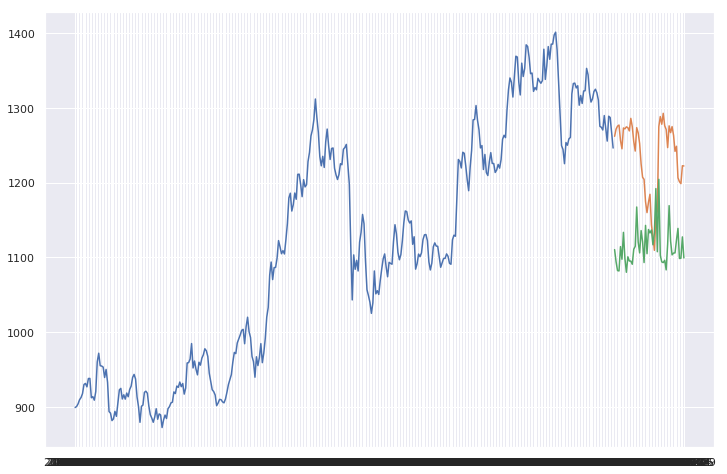

In [50]:
#Plotting the actual values of adjusted close price from the testing data with the predicted values 
test.index = test['Date']
train.index = train['Date']

figure(figsize=(12,8))
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

# Quadratic linear regression

In [87]:
polynomial_features= PolynomialFeatures(degree=4)
x_poly = polynomial_features.fit_transform(x_train)
x_poly_test = polynomial_features.fit_transform(x_valid)

In [91]:
# training the polynomial regression model
model = LinearRegression()
model.fit(x_poly, y_train)
preds = model.predict(x_poly_test)

In [92]:
#Checking the root mean squared error made by the model
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

133.1501952679034

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



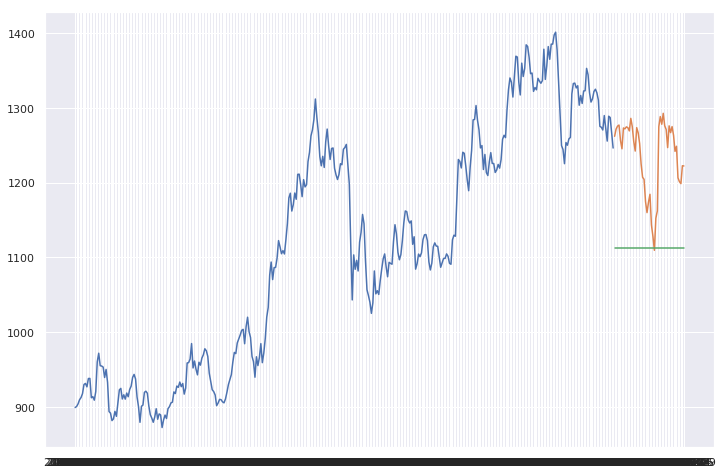

In [93]:
#Adding the predictind values to the testing data
test['Predictions'] = 0
test['Predictions'] = preds

test.index = test['Date']
train.index = train['Date']

figure(figsize=(12,8))
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

# Ridge Regression

In [76]:
# training the ridge regression model
ridge = Ridge(alpha = 4, normalize = True)
ridge.fit(x_train, y_train)             # Fit a ridge regression on the training data
pred2 = ridge.predict(x_valid)           # Use this model to predict the test data
print(pd.Series(ridge.coef_, index = x_train.columns)) # Print coefficients

daily_gain           15.811208
hi_lo_per             4.572538
pct_change_price      0.158112
pct_change_volume     0.000421
dtype: float64


In [77]:
#Checking the root mean squared error made by the model
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(pred2)),2)))
rms

133.74130816549413

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



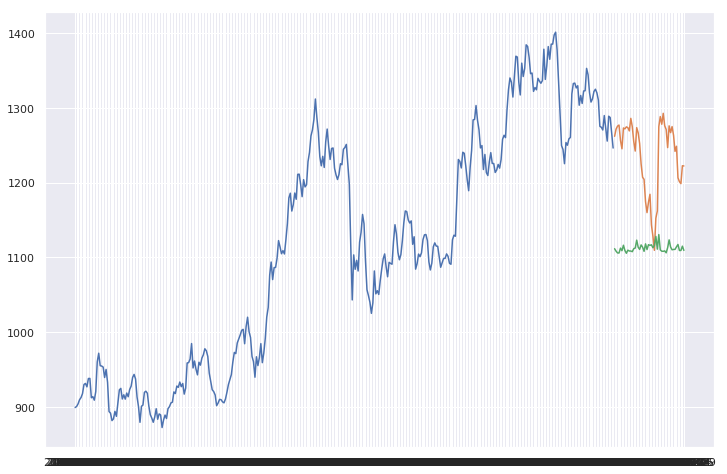

In [78]:
#Adding the predictind values to the testing data
test['Predictions'] = 0
test['Predictions'] = pred2

test.index = test['Date']
train.index = train['Date']

figure(figsize=(12,8))
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])

# Lasso 

In [80]:
# training the ridge regression model
lasso = Lasso(max_iter = 10000, normalize = True)
lassocv = LassoCV(alphas = None, cv = 10, max_iter = 100000, normalize = True)
lassocv.fit(x_train, y_train)

lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(x_train, y_train)
pred3 = lasso.predict(x_valid)

In [81]:
#Checking the root mean squared error made by the model
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(pred3)),2)))
rms

133.69508695699153

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/home/parikshit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



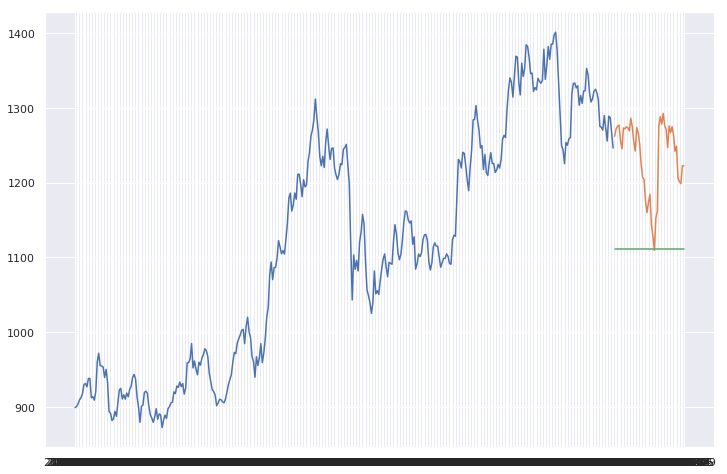

In [83]:
#Adding the predictind values to the testing data
test['Predictions'] = 0
test['Predictions'] = pred3

test.index = test['Date']
train.index = train['Date']

figure(figsize=(12,8))
plt.plot(train['Adj Close'])
plt.plot(test[['Adj Close', 'Predictions']])